In [18]:
import pandas as pd
import urllib.parse
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("clean_data.csv", low_memory=False)

In [20]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 18030 rows and 26 columns.


In [21]:
df

,id,Locality,Zip,Province,Type of property,Subtype of property,Type of sale,Price,Price of square meter,Building condition,...,Kitchen values,Surface of the land,Primary energy consumption,Energy_classes,Terrace,Terrace surface,Garden,Garden surface,Open fire,Swimming pool
0,10578809,liedekerke,1770,Flemish Brabant,house,house,for sale,349000,1938.89,As new,...,3,256.00,241,5,1,25.00,1,150.00,0.00,0.00
1,10578941,sint-andries,8200,West Flanders,house,house,for sale,625000,3378.38,As new,...,3,539.00,292,5,0,0.00,1,400.00,0.00,0.00
2,10577515,seraing,4100,Liège,house,house,for sale,149000,1419.05,Good,...,2,105.00,469,3,1,NaN,1,25.00,0.00,0.00
3,10577846,andenne,5300,Namur,house,house,for sale,335000,1602.87,Good,...,1,2185.00,196,6,1,NaN,1,NaN,0.00,0.00
4,10523130,forest,1190,Brussels Capital Region,house,house,for sale,545000,2145.67,To be done up,...,1,260.00,517,2,1,45.00,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18025,9577413,sint-truiden,3800,Limburg,apartment,apartment,for sale,284900,2907.14,NaN,...,-1,NaN,-1,-1,1,18.00,1,NaN,0.00,0.00
18026,10563952,nieuwpoort,8620,West Flanders,apartment,apartment,for sale,299000,6953.49,NaN,...,3,NaN,318,4,1,NaN,0,0.00,0.00,0.00
18027,9577415,sint-truiden,3800,Limburg,apartment,apartment,for sale,299900,2911.65,NaN,...,-1,NaN,-1,-1,1,17.00,1,NaN,0.00,0.00
18028,9577414,sint-truiden,3800,Limburg,apartment,apartment,for sale,299900,3190.43,NaN,...,-1,NaN,-1,-1,1,16.00,1,135.00,0.00,0.00


In [22]:
house_target = ['id','Zip','Price','Living area','Number of rooms','Furnished','Garden surface','Terrace surface','Open fire','Surface of the land','Number of facades','Swimming pool','Building Cond. values','Kitchen values','Primary energy consumption']
apartment_target = ['id','Zip','Price','Living area','Number of rooms','Furnished','Open fire','Building Cond. values','Kitchen values','Primary energy consumption']

In [23]:
df_houses = df[df['Type of property'] == 'house'][house_target]
df_apartments = df[df['Type of property'] == 'apartment'][apartment_target]

all_missing_value_df = df.isnull().mean() * 100
houses_missing_value_df = df_houses.isnull().mean() * 100
apartments_missing_value_df = df_apartments.isnull().mean() * 100
pd.set_option('display.float_format', '{:.2f}'.format)
print("all_missing_value")
print(all_missing_value_df)
print("")
print("houses_missing_value")
print(houses_missing_value_df)
print("")
print("apartments_missing")
print(apartments_missing_value_df)

all_missing_value
id                            0.00
Locality                      0.00
Zip                           0.00
Province                      0.00
Type of property              0.00
Subtype of property           0.00
Type of sale                  0.00
Price                         0.00
Price of square meter         0.00
Building condition           15.77
Building Cond. values         0.00
Number of facades            23.31
Number of rooms               1.84
Living area                   0.00
Furnished                     0.00
Fully equipped kitchen       21.81
Kitchen values                0.00
Surface of the land          49.83
Primary energy consumption    0.00
Energy_classes                0.00
Terrace                       0.00
Terrace surface              23.89
Garden                        0.00
Garden surface               12.25
Open fire                     0.00
Swimming pool                 0.00
dtype: float64

houses_missing_value
Price                         0.00


In [24]:
# Define provinces in each region
flanders_provinces = ['Flemish Brabant','Antwerp','Limburg','West Flanders','East Flanders']
wallonia_provinces = ['Walloon Brabant','Liège','Namur','Hainaut','Luxembourg']
brussels_provinces = ['Brussels Capital Region']

df_flanders = df[df['Province'].isin(flanders_provinces)]
df_wallonia = df[df['Province'].isin(wallonia_provinces)]
df_brussels = df[df['Province'].isin(brussels_provinces)]


In [25]:
def calculate_metrics(region_df):
    return region_df.groupby('Zip').agg(Avg_Price=('Price','mean'),
                                        Median_Price=('Price','median'),
                                        Price_Per_Sq_Meter=('Price of square meter','mean'))

In [26]:
belgium_metrics = calculate_metrics(df)
flanders_metrics = calculate_metrics(df_flanders)
wallonia_metrics = calculate_metrics(df_wallonia)
brussels_metrics = calculate_metrics(df_brussels)


most_expensive_belgium = belgium_metrics['Avg_Price'].idxmax()
least_expensive_belgium = belgium_metrics['Avg_Price'].idxmin()

most_expensive_flanders = flanders_metrics['Avg_Price'].idxmax()
least_expensive_flanders = flanders_metrics['Avg_Price'].idxmin()

most_expensive_wallonia = wallonia_metrics['Avg_Price'].idxmax()
least_expensive_wallonia = wallonia_metrics['Avg_Price'].idxmin()

most_expensive_brussels = brussels_metrics['Avg_Price'].idxmax()
least_expensive_brussels = brussels_metrics['Avg_Price'].idxmin()

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)

print(f'Most expensive municipality in Belgium: {most_expensive_belgium}')
print(belgium_metrics.loc[most_expensive_belgium])
print(f'Least expensive municipality in Belgium: {least_expensive_belgium}')
print(belgium_metrics.loc[least_expensive_belgium])

print(f'Most expensive municipality in Flanders: {most_expensive_flanders}')
print(flanders_metrics.loc[most_expensive_flanders])
print(f'Least expensive municipality in Flanders: {least_expensive_flanders}')
print(flanders_metrics.loc[least_expensive_flanders])

print(f'Most expensive municipality in Wallonia: {most_expensive_wallonia}')
print(wallonia_metrics.loc[most_expensive_wallonia])
print(f'Least expensive municipality in Wallonia: {least_expensive_wallonia}')
print(wallonia_metrics.loc[least_expensive_wallonia])

print(f'Most expensive municipality in Brussels: {most_expensive_brussels}')
print(brussels_metrics.loc[most_expensive_brussels])
print(f'Least expensive municipality in Brussels: {least_expensive_brussels}')
print(brussels_metrics.loc[least_expensive_brussels])


Most expensive municipality in Belgium: 8902
Avg_Price            2500000.00
Median_Price         2500000.00
Price_Per_Sq_Meter      3333.33
Name: 8902, dtype: float64
Least expensive municipality in Belgium: 5680
Avg_Price            49950.00
Median_Price         49950.00
Price_Per_Sq_Meter     445.40
Name: 5680, dtype: float64
Most expensive municipality in Flanders: 8902
Avg_Price            2500000.00
Median_Price         2500000.00
Price_Per_Sq_Meter      3333.33
Name: 8902, dtype: float64
Least expensive municipality in Flanders: 9970
Avg_Price            168000.00
Median_Price         168000.00
Price_Per_Sq_Meter     1768.42
Name: 9970, dtype: float64
Most expensive municipality in Wallonia: 1380
Avg_Price            1396184.35
Median_Price         1195000.00
Price_Per_Sq_Meter      3812.90
Name: 1380, dtype: float64
Least expensive municipality in Wallonia: 5680
Avg_Price            49950.00
Median_Price         49950.00
Price_Per_Sq_Meter     445.40
Name: 5680, dtype: float64


In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']
apartdf = df_apartments.select_dtypes(include=numerics)
noIdApartDf = apartdf.loc[:, ~apartdf.columns.isin(['id'])]
noIdApartDf.corr(method = 'spearman')

,Price,Living area,Number of rooms,Furnished,Open fire,Building Cond. values,Kitchen values,Primary energy consumption
Price,1.00,0.64,0.52,-0.00,0.10,0.19,0.25,-0.27
Living area,0.64,1.00,0.75,-0.18,0.11,0.07,0.14,-0.15
Number of rooms,0.52,0.75,1.00,-0.10,0.07,0.03,0.08,-0.06
Furnished,-0.00,-0.18,-0.10,1.00,-0.03,0.06,0.01,0.05
Open fire,0.10,0.11,0.07,-0.03,1.00,-0.00,0.01,0.02
Building Cond. values,0.19,0.07,0.03,0.06,-0.00,1.00,0.34,-0.06
Kitchen values,0.25,0.14,0.08,0.01,0.01,0.34,1.00,-0.11
Primary energy consumption,-0.27,-0.15,-0.06,0.05,0.02,-0.06,-0.11,1.00


In [29]:
housedf = df_houses.select_dtypes(include=numerics)
noIdHouseDf = housedf.loc[:, ~housedf.columns.isin(['id','Zip'])]
noIdHouseDf.corr(method = 'spearman')

,Price,Living area,Number of rooms,Furnished,Garden surface,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption
Price,1.00,0.71,0.53,0.01,0.11,0.19,0.19,0.42,0.30,0.26,0.27,0.19,-0.33
Living area,0.71,1.00,0.65,-0.01,0.08,0.14,0.17,0.42,0.23,0.22,0.14,0.09,-0.21
Number of rooms,0.53,0.65,1.00,0.01,0.10,0.13,0.10,0.25,0.13,0.16,0.08,0.06,-0.14
Furnished,0.01,-0.01,0.01,1.00,0.01,0.01,-0.01,-0.02,0.00,0.04,0.03,0.03,-0.02
Garden surface,0.11,0.08,0.10,0.01,1.00,0.40,0.11,0.34,0.21,0.07,0.08,0.08,0.02
Terrace surface,0.19,0.14,0.13,0.01,0.40,1.00,0.08,0.17,0.15,0.16,0.23,0.24,-0.14
Open fire,0.19,0.17,0.10,-0.01,0.11,0.08,1.00,0.20,0.20,0.08,0.03,0.03,-0.04
Surface of the land,0.42,0.42,0.25,-0.02,0.34,0.17,0.20,1.00,0.72,0.25,0.03,0.04,0.04
Number of facades,0.30,0.23,0.13,0.00,0.21,0.15,0.20,0.72,1.00,0.22,0.07,0.06,0.04
Swimming pool,0.26,0.22,0.16,0.04,0.07,0.16,0.08,0.25,0.22,1.00,0.13,0.11,-0.10


In [30]:
# How are variables correlated to each other? (Why?)
corr_matrix = noIdHouseDf.corr(method='spearman')

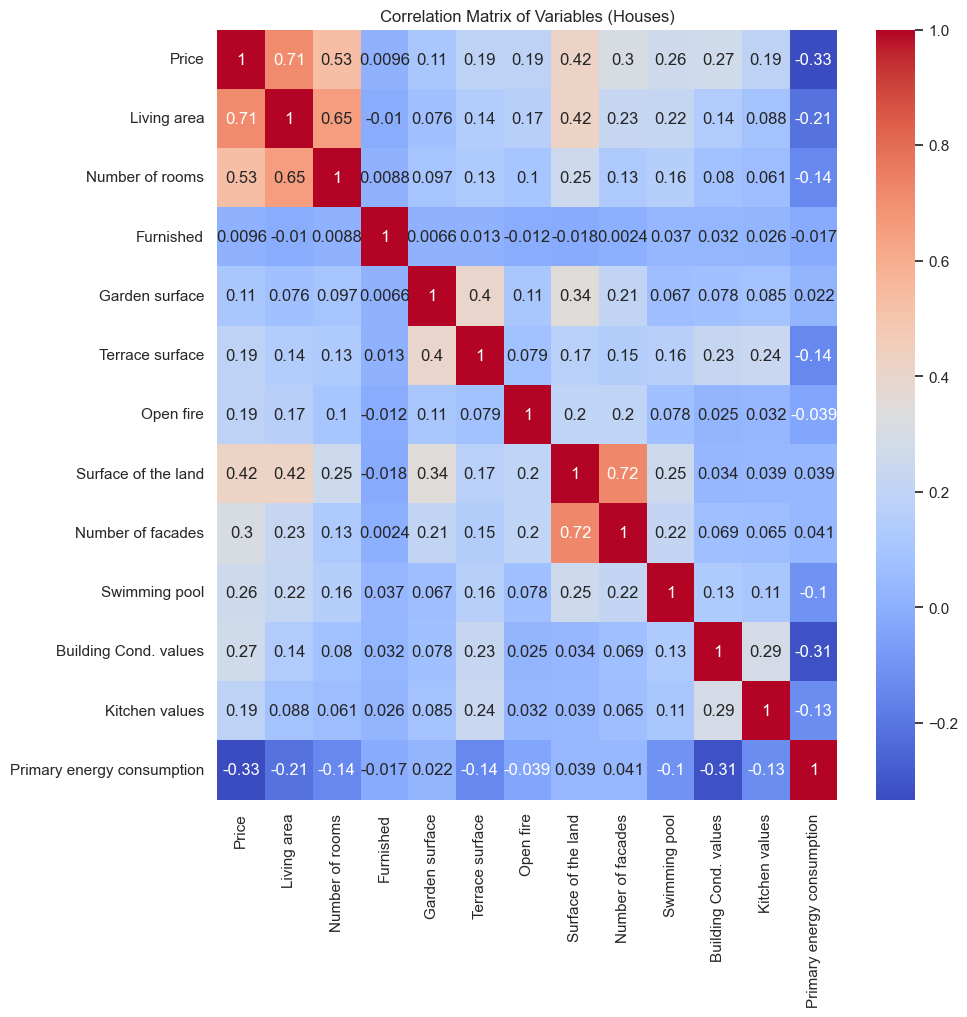

In [31]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables (Houses)')
sns.set (rc = {'figure.figsize':(10, 10)})
plt.show()